In [148]:
import pandas as pd

from utils import plot_cf_matrix

from joblib import dump

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

## Loading data

In [131]:
data = pd.read_csv('../dataset/bank-preprocessed.csv')

In [167]:
data.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,0,2143,1,0,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,44,1,0,29,1,0,5,151,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,33,1,0,2,1,1,5,76,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,35,2,0,231,1,0,5,139,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,28,2,0,447,1,1,5,217,1,-1,...,0,0,1,0,0,0,0,0,0,1


In [118]:
X = data.drop(columns=['y', 'duration'])
y = data.y

## Train test split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=42)

## Modeling

In [143]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

preds = mlp.predict(X_test)
print(classification_report(y_test, preds));

              precision    recall  f1-score   support

           0       0.95      0.34      0.50      7644
           1       0.15      0.86      0.25      1015

    accuracy                           0.40      8659
   macro avg       0.55      0.60      0.38      8659
weighted avg       0.85      0.40      0.47      8659



## Grid Search

In [139]:
params_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}


grid_search = GridSearchCV(MLPClassifier(), 
                           params_grid,
                           scoring  = "f1",
                           n_jobs= -1, 
                           verbose=3,
                           cv = 10)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='f1', verbose=3)

In [141]:
grid_search.best_estimator_

MLPClassifier(activation='tanh', alpha=0.05, learning_rate='adaptive')

In [144]:
preds = grid_search.predict(X_test)
print(classification_report(y_test, preds));

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7644
           1       0.26      0.40      0.31      1015

    accuracy                           0.79      8659
   macro avg       0.59      0.62      0.60      8659
weighted avg       0.84      0.79      0.81      8659



## Confusion Matrix

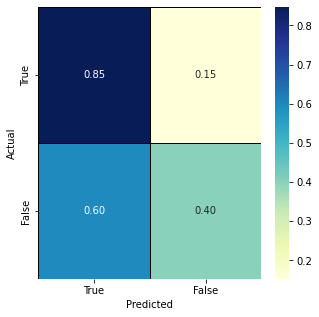

In [153]:
plot_cf_matrix(y_test, preds)

## Exporting Grid Search Results

In [174]:
params = grid_search.cv_results_['params']
scores = grid_search.cv_results_['mean_test_score']

results_mlp = pd.DataFrame({'model': 'MLP', 'parameters': params, 'valid_score': scores})
top_10 = results_mlp.sort_values('valid_score', ascending=False)[:10]
top_10.to_csv('../models/mlp_results.csv', index=False)

## Exporting model

In [ ]:
dump(grid_search.best_estimator_, '../models/mlp.joblib')